# INFO 2950 Final Project

In [1]:
# pip install linearmodels

In [2]:
#Imports
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests
from bs4 import BeautifulSoup
import os
import re
import pdfplumber
import duckdb
import statsmodels.api as sm
from io import BytesIO
from linearmodels.panel import PanelOLS
from sklearn.model_selection import train_test_split

## Introduction:

## Data Description and Cleaning:

In [3]:
# This dataset was compiled and cleaned in our separate data cleaning notebook.
# For full citations, please refer to INFO2950_Phase_4_Data in the GitHub repository.
# Or in the Acknowledgements and Bibliography section. 

# Clean, merged data file
data = pd.read_csv('final_ev_dataset.csv')

display(data.head(n=10))

,year,state,registration,population,reg_per_capita,min_price,incentives,renewable_prod,charge_stations,new_reg_per_capita,reg_rate_per_capita,charge_per_capita
0,2017,California,189700.0,39358497,0.004820,25220.0,20,2065.200195,1721,0.001225,33.411722,0.043726
1,2018,California,273500.0,39461588,0.006931,25220.0,21,2771.399902,1934,0.002124,43.798365,0.049010
2,2019,California,349700.0,39512223,0.008850,25320.0,21,2786.600098,5592,0.001929,27.697206,0.141526
3,2020,California,425300.0,39503200,0.010766,29900.0,21,478.200012,6258,0.001914,21.646309,0.158418
4,2021,California,563100.0,39145060,0.014385,36030.0,33,1986.200073,6288,0.003520,33.611998,0.160633
5,2022,California,903600.0,39040616,0.023145,28100.0,46,2645.800049,6302,0.008722,60.898130,0.161422
6,2017,Florida,15900.0,20963613,0.000758,25220.0,20,346.700012,525,0.000205,34.779628,0.025043
7,2018,Florida,27400.0,21244317,0.001290,25220.0,21,527.599976,590,0.000541,70.050064,0.027772
8,2019,Florida,40300.0,21477737,0.001876,25320.0,21,682.200012,1433,0.000601,45.481824,0.066720
9,2020,Florida,58200.0,21591299,0.002696,29900.0,21,484.699982,1526,0.000829,43.657296,0.070677


## Preregistration Statement: 

<p style="padding-bottom: 15px;">The following analyses aim to elucidate the impact of federal incentives and renewable energy production on EV adoption at the state level, providing insights for policymakers to design effective strategies to promote sustainable transportation.</p>

### Preregistration Statement 1

- **Hypothesis**:  
  State-level electric vehicle (EV) registrations increase with the total number of federal incentives available.

- **Context**:  
  Federal incentives, such as tax credits and subsidies, are designed to reduce the upfront cost of EVs, making them more accessible to consumers. Studies have shown that these incentives significantly influence consumer purchasing decisions, leading to higher EV adoption rates. For instance, research indicates that federal tax credits have been a major driver in the growth of the EV market in the United States (Javadnejad et al., 2023).

- **Analysis**:  
  To test this hypothesis, we will run a linear regression per state with the total count of federal EV incentives as the independent variable and the total EV registrations in the state as the dependent variable. We will test whether βfederal_incentives > 0 for each model, which would indicate that an increase in total federal incentives is associated with increased total EV registrations at the state level.  
---
### Preregistration Statement 2

- **Hypothesis**:  
  State-level EV registrations increase with the state's renewable energy production.

- **Context**:  
  States that produce more renewable energy may foster a culture of environmental consciousness, leading to higher EV adoption rates. Additionally, consumers in these states might prefer EVs to align with the clean energy available, reducing the overall carbon footprint of their transportation. Research has shown a correlation between renewable energy policies and increased EV adoption, suggesting that the availability of clean energy sources can influence consumer behavior (Das & Bhat, 2021).

- **Analysis**:  
  For this hypothesis, we will run a linear regression per state with the renewable energy production of the state as the independent variable and the total EV registrations in the state as the dependent variable. We will test whether βrenewable_energy > 0 for each model, which would indicate that an increase in a state’s renewable energy production is associated with increased total EV registrations of the state.  

## Data Analysis: 

**Part 1: Preregistration Statement 1**

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     37.74
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           2.01e-06
Time:                        23:06:32   Log-Likelihood:                 144.65
No. Observations:                  27   AIC:                            -285.3
Df Residuals:                      25   BIC:                            -282.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.001     -3.060      0.0

6    -0.000580
28   -0.000515
0     0.000439
19   -0.000633
1     0.001197
dtype: float64

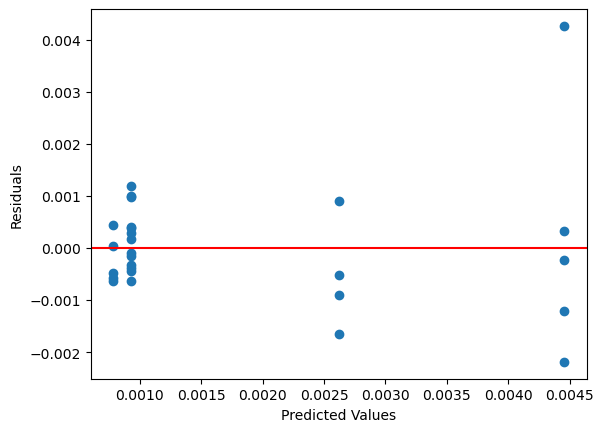

In [16]:
# Train, Test split
train, test = train_test_split(
    data, 
    test_size=0.1, 
    random_state=2950
)

# Train data
X_train_ps1 = train[['incentives']] 
X_train_ps1 = sm.add_constant(X_train_ps1) 
y_train_ps1 = train['new_reg_per_capita']

# Fit model
model_ps1 = sm.OLS(y_train_ps1, X_train_ps1)
results = model_ps1.fit()

print(results.summary())

# Test data
X_test_ps1 = test[['incentives']] 
X_test_ps1 = sm.add_constant(X_test_ps1)
y_test_ps1 = test['new_reg_per_capita']

# Make predictions
train_pred_ps1 = results.predict(X_train_ps1)
test_pred_ps1 = results.predict(X_test_ps1)

# Residuals
residuals_ps1 = y_train_ps1 - train_pred_ps1
display(residuals.head())

# Residual Plot
def residual_plot(pred, resid):
    plt.scatter(pred, resid, marker='o')
    plt.axhline(y=0, color='red')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals') 
    plt.show()

residual_plot(train_pred_ps1, residuals_ps1)

In [17]:
# Regression with state dummies
state_dummies = pd.get_dummies(data['state'], dtype = int)

X = data['incentives']
X = pd.concat([X, state_dummies], axis=1)
X = sm.add_constant(X) 

y = data['new_reg_per_capita']  

model_ps1_dummies = sm.OLS(y, X).fit()

print(model_ps1_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     25.53
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           7.06e-09
Time:                        23:07:18   Log-Likelihood:                 175.69
No. Observations:                  30   AIC:                            -339.4
Df Residuals:                      24   BIC:                            -331.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.000     -4.931      0.0

**Part 2: Preregistration Statement 2**

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.3962
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.535
Time:                        23:08:42   Log-Likelihood:                 132.44
No. Observations:                  27   AIC:                            -260.9
Df Residuals:                      25   BIC:                            -258.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.000      4.

6    -0.000580
28   -0.000515
0     0.000439
19   -0.000633
1     0.001197
dtype: float64

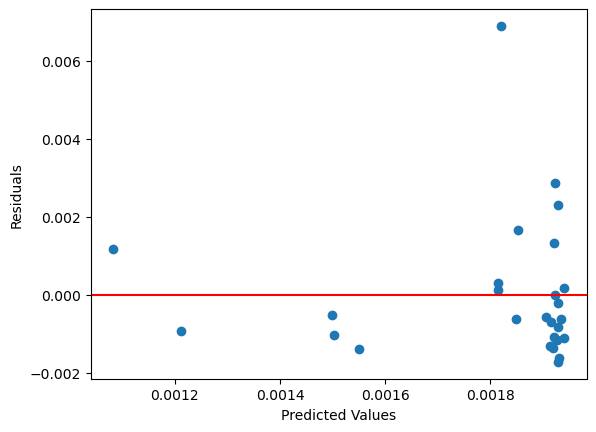

In [18]:
# Train data
X_train_ps2 = train[['renewable_prod']] 
X_train_ps2 = sm.add_constant(X_train_ps2) 
y_train_ps2 = train['new_reg_per_capita']

# Fit model
model_ps2 = sm.OLS(y_train_ps2, X_train_ps2)
results = model_ps2.fit()

print(results.summary())

# Test data
X_test_ps2 = test[['incentives']] 
X_test_ps2 = sm.add_constant(X_test_ps2)
y_test_ps2 = test['new_reg_per_capita']

# Make predictions
train_pred_ps2 = results.predict(X_train_ps2)
test_pred_ps2 = results.predict(X_test_ps2)

# Residuals
residuals_ps2 = y_train_ps2 - train_pred_ps2
display(residuals.head())

# Residual Plot
residual_plot(train_pred_ps2, residuals_ps2)

In [21]:
# Regression with state dummies
state_dummies = pd.get_dummies(data['state'], dtype = int)

X = data['renewable_prod']
X = pd.concat([X, state_dummies], axis=1)
X = sm.add_constant(X) 

y = data['new_reg_per_capita']  

model_ps2_dummies = sm.OLS(y, X).fit()

print(model_ps2_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1.627
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.191
Time:                        23:09:54   Log-Likelihood:                 152.42
No. Observations:                  30   AIC:                            -292.8
Df Residuals:                      24   BIC:                            -284.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0012      0.000      3.

**Part 3: Multivariate Regression Model**

$H_{0}$ : None of the predictor variables is useful in terms of predicting the EV registration (~adoption) rate.
- $EV\_Registration_{st} = \beta_0 + \beta_1 Min\_Price_t + \beta_2 Federal\_Incentive_t + \beta_3 Renewable\_Production_{st} + \beta_4 Charge\_Stations_{st} + \alpha_s + \lambda_t + \epsilon_{st}$

<br>

$H_{A}$ : At least one of the predictor variables (minimum price, federal incentives, charging stations, renewable energy production) is useful in terms of predicting the state-level EV registration rates.
- $\beta_i ≠ 0$ (where i ~ [0, 5])

In [ ]:
data = data.set_index(['state', 'year'])

In [ ]:
input_var = ['min_price', 'incentives', 'renewable_prod', 'charge_per_capita']
# input_var = ['min_price', 'incentives', 'renewable_prod', 'charge_stations']

X = data[input_var]
X = sm.add_constant(X)

# Per Capita
y = data['new_reg_per_capita'] # Option 1
# y = data['reg_rate_per_capita']
# y = data['reg_per_capita'] # Option 2
# y = data['registration']

# Fit PanelOLS with fixed effects
model = PanelOLS(y, X, entity_effects=True).fit()
print(model.summary)

**Interpretation of Coefficients**
- $\beta_0$ (const):
- $\beta_1$ (min_price): 
- $\beta_2$ (incentives): 
- $\beta_3$ (renewable_prod): 
- $\beta_4$ (charge_stations): 

## Evaluation of Significance: 

## Conclusions: 

## Limitations: 

## Acknowledgements and Bibliography: 

**<h4>Current Notebook</h4>**

<p style="padding-left: 40px; text-indent: -40px;">
Das, P.K., & Bhat, M.Y. (2021). Renewable energy policies and EV adoption. <i>Environmental Science and Pollution Research</i>. Retrieved from <a href="https://link.springer.com/article/10.1007/s11356-021-18211-w">https://link.springer.com/article/10.1007/s11356-021-18211-w</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
Javadnejad, R., et al. (2023). Federal tax credits and EV adoption. <i>Environment, Development and Sustainability</i>. Retrieved from <a href="https://link.springer.com/article/10.1007/s10669-023-09958-3">https://link.springer.com/article/10.1007/s10669-023-09958-3</a>
</p>

---

**<h4>Data Cleaning Notebook (INFO2950_Phase_4_Data)</h4>**

<p style="padding-left: 40px; text-indent: -40px;">
    Federal Highway Administration. (2023, March 14). <i>Biden-Harris Administration opens applications for first round of $2.5 billion program to build EV charging infrastructure</i>. Retrieved from <a href="https://highways.dot.gov/newsroom/biden-harris-administration-opens-applications-first-round-25-billion-program-build-ev">https://highways.dot.gov/newsroom/biden-harris-administration-opens-applications-first-round-25-billion-program-build-ev</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Federal Highway Administration. (n.d.). <i>Fixing America's Surface Transportation Act or "FAST Act"</i>. Retrieved from <a href="https://ops.fhwa.dot.gov/fastact/#:~:text=Fixing%20America's%20Surface%20Transportation%20Act%20or%20%22FAST%20Act%22&text=On%20December%204%2C%202015%2C%20President,funding%20certainty%20for%20surface%20transportation.">https://ops.fhwa.dot.gov/fastact/#:~:text=Fixing%20America's%20Surface%20Transportation%20Act%20or%20"FAST Act"</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Joint Office of Energy and Transportation (2023, September 21). <i>EV Charger Reliability and Accessibility Accelerator Webinar</i>. Retrieved from <a href="https://driveelectric.gov/webinars/ev-charger-reliability-accessibility-accelerator">https://driveelectric.gov/webinars/ev-charger-reliability-accessibility-accelerator</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    National Renewable Energy Laboratory. (n.d.). <i>American Made Program 5-Year Report</i>. Retrieved from <a href="https://americanmadechallenges.org/American-Made-Program-5-Year-Report.pdf">https://americanmadechallenges.org/American-Made-Program-5-Year-Report.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Open Charge Map. (2024). <i>Open Charge Map API</i>. Retrieved November 20, 2024, from <a href="https://openchargemap.org/site/develop/api">https://openchargemap.org/site/develop/api</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Census Bureau, Population Division. (2019). Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019 (NST-EST2019-01) [Data file]. Retrieved from <a href="https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx">https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Census Bureau, Population Division. (2023). <i>Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2023 (NST-EST2023-POP) [Data file]</i>. Retrieved from <a href="https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx">https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Agriculture. (2022). <i>EV Charging Stations Fact Sheet</i>. Retrieved from <a href="https://www.rd.usda.gov/sites/default/files/508_RD_FS_71EVChargingStations.pdf">https://www.rd.usda.gov/sites/default/files/508_RD_FS_71EVChargingStations.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (2023). <i>Alternative Fuels Data Center: Vehicle Registration Data</i>. Retrieved from <a href="https://afdc.energy.gov/vehicle-registration?year=2023">https://afdc.energy.gov/vehicle-registration?year=2023</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (2023). <i>Domestic Manufacturing Conversion Grants</i>. Retrieved from <a href="https://www.energy.gov/mesc/domestic-manufacturing-conversion-grants">https://www.energy.gov/mesc/domestic-manufacturing-conversion-grants</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (n.d.). <i>Find and Compare Cars</i>. Retrieved from <a href="https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=0">https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy, Office of Energy Efficiency & Renewable Energy. (2024). <i>Alternative Fuels Data Center: Data Download [Data file]</i>. Retrieved November 20, 2024, from <a href="https://afdc.energy.gov/data_download">https://afdc.energy.gov/data_download</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Transportation. (n.d.). <i>Resilient Surface Transportation Grants</i>. Retrieved from <a href="https://www.transit.dot.gov/grants?combine=Resilient+Surface+Transportation+Grants&field_grant_type_target_id=All">https://www.transit.dot.gov/grants?combine=Resilient+Surface+Transportation+Grants&field_grant_type_target_id=All</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Energy Information Administration. (n.d.). <i>State Energy Data System (SEDS): 1960-2021 (Complete) [Data file]</i>. Retrieved from <a href="https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf">https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Environmental Protection Agency. (2022). <i>Bipartisan Infrastructure Law Clean School Bus Program: Initial Implementation Report to Congress</i>. Retrieved from <a href="https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1014098.pdf">https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1014098.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Environmental Protection Agency. (2024, April 24). <i>Biden-Harris Administration announces nearly $1 billion in grants to invest in America's clean energy future</i>. Retrieved from <a href="https://www.epa.gov/newsreleases/biden-harris-administration-announces-nearly-1-billion-grants-invest-americas-clean-0">https://www.epa.gov/newsreleases/biden-harris-administration-announces-nearly-1-billion-grants-invest-americas-clean-0</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    WE ACT for Environmental Justice. (2023). <i>TCTAC</i>. Retrieved from <a href="https://www.weact.org/tctac/">https://www.weact.org/tctac/</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Western Interstate Energy Board. (n.d.). <i>Western Interstate Energy Board supports continued funding for the U.S. Department of Energy State Energy Program (SEP)</i>. Retrieved from <a href="https://www.westernenergyboard.org/western-interstate-energy-board-supports-continued-funding-for-the-u-s-department-of-energy-state-energy-program-sep/">https://www.westernenergyboard.org/western-interstate-energy-board-supports-continued-funding-for-the-u-s-department-of-energy-state-energy-program-sep/</a>
</p>




